## Price prediction

## Import Libraries & Dataset



In [3]:
import numpy as np
import pandas as pd

listings = pd.read_csv("../input/listings.csv")

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [9]:
listings['price'] = listings['price'].map(lambda p: int(p[1:-3].replace(",", "")) if isinstance(p, str) else p)
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

In [10]:
np.concatenate(listings['amenities'].map(lambda amns: amns.split("|")).values)

array(['TV', 'Wireless Internet', 'Kitchen', ..., 'Essentials',
       'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'], dtype='<U42')

In [13]:

amenities = [amns for amns in listings['amenities'].values if isinstance(amns, np.ndarray) and amns.size > 0]

if amenities:
    concatenated_amenities = np.concatenate(amenities)
else:
    concatenated_amenities = np.array([])  # Eğer amenities boşsa, boş bir dizi oluşturun


In [14]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|")).values))
amenities_matrix = np.array([listings['amenities'].map(lambda amns: amn in amns).values for amn in amenities])

In [15]:
amenities_matrix

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [False, False,  True, ...,  True, False,  True],
       [False, False,  True, ...,  True,  True,  True]])

In [17]:
listings['price'] = listings['price'].map(lambda p: int(p[1:-3].replace(",", "")) if isinstance(p, str) else p)
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

In [18]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [20]:
features = listings[['host_listings_count', 'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                     'review_scores_rating']]

In [21]:
listings['amenities'].head()

0    TV|Wireless Internet|Kitchen|Free Parking on P...
1    TV|Internet|Wireless Internet|Air Conditioning...
2    TV|Cable TV|Wireless Internet|Air Conditioning...
3    TV|Internet|Wireless Internet|Air Conditioning...
4    Internet|Wireless Internet|Air Conditioning|Ki...
Name: amenities, dtype: object

In [22]:
listings['amenities'].map(lambda amns: amns.split("|")).head()

0    [TV, Wireless Internet, Kitchen, Free Parking ...
1    [TV, Internet, Wireless Internet, Air Conditio...
2    [TV, Cable TV, Wireless Internet, Air Conditio...
3    [TV, Internet, Wireless Internet, Air Conditio...
4    [Internet, Wireless Internet, Air Conditioning...
Name: amenities, dtype: object

In [23]:

np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))[1:]

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises',
       'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers',
       'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'], dtype='<U42')

In [24]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|"))))[1:]
amenity_arr = np.array([listings['amenities'].map(lambda amns: amn in amns) for amn in amenities])
amenity_arr

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [False, False,  True, ...,  True, False,  True],
       [False, False,  True, ...,  True,  True,  True]])

In [26]:
features = pd.concat([features, pd.DataFrame(data=amenity_arr.T, columns=amenities)], axis=1)

In [27]:
listings['host_is_superhost'].head()

0    f
1    f
2    t
3    f
4    t
Name: host_is_superhost, dtype: object

In [28]:
for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    features[tf_feature] = listings[tf_feature].map(lambda s: False if s == "f" else True)

In [29]:
listings['bed_type'].head()

0    Real Bed
1    Real Bed
2    Real Bed
3    Real Bed
4    Real Bed
Name: bed_type, dtype: object

In [30]:
pd.get_dummies(listings['bed_type']).head()

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [31]:
for categorical_feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']:
    features = pd.concat([features, pd.get_dummies(listings[categorical_feature])], axis=1)

In [32]:
features.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,review_scores_rating,...,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,1,1,4,1.5,2.0,3.0,250,1,0,NaN,...,False,False,True,False,False,False,False,False,False,True
1,1,1,2,1.0,1.0,1.0,65,0,36,94.0,...,False,False,False,True,False,False,False,False,False,True
2,1,1,2,1.0,1.0,1.0,65,1,41,98.0,...,False,False,False,True,False,False,False,False,False,True
3,1,1,4,1.0,1.0,2.0,75,2,1,100.0,...,False,False,False,True,False,False,False,False,False,True
4,1,1,2,1.5,1.0,2.0,79,1,29,99.0,...,False,False,False,True,False,False,False,False,False,True


In [33]:
for col in features.columns[features.isnull().any()]:
    print(col)

bathrooms
bedrooms
beds
review_scores_rating


In [35]:
for col in features.columns[features.isnull().any()]:
    features[col] = features[col].fillna(features[col].median())

<Axes: >

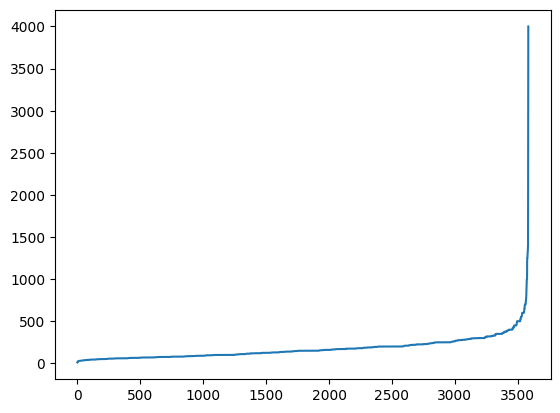

In [36]:
features['price'].sort_values().reset_index(drop=True).plot()

In [42]:
features['price'] = pd.to_numeric(features['price'], errors='coerce')

In [50]:
fitters = features[features['price'] <= 600]

# Model Classification


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
clf = LinearRegression()
y = fitters['price']
clf.fit(fitters.drop('price', axis='columns'), y)

LinearRegression()

In [54]:
y_pred = clf.predict(fitters.drop('price', axis='columns'))

## Measuring Performance



In [55]:
import sklearn.metrics

In [56]:
mse = sklearn.metrics.mean_squared_error(y, y_pred)
mse

3526.9928221489977

In [57]:
root_mse = mse**(1/2)
root_mse

59.38849065390531

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


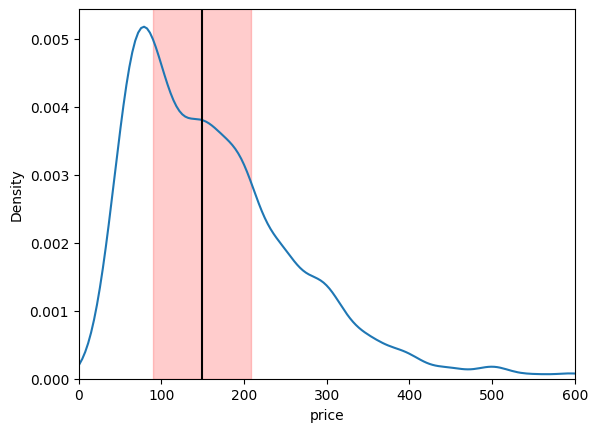

In [59]:
sns.kdeplot(y)
ax = plt.gca()
ax.set_xlim([0, 600])
plt.axvline(y.median(), c='black')
ax.add_patch(
    patches.Rectangle((y.median() - root_mse, 0), 2*root_mse, 0.006,
                      color='r', alpha=0.2)
)

In [60]:
r_squared = sklearn.metrics.r2_score(y, y_pred)
r_squared

0.6553776855623248